# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
 + Smart cab doesnt move at all during the simulation.It does not update its status thus it remains in idle state only.
 
 + Driving agent is receiving both negative and positive rewards.Initially rewards are positive then it becomes negative.
 
 + Initially when light is red and the agent is in idle state it receives positive rewards,when light changes to green agent starts receiving negative rewards,becuase agent is idle at green light with no incoming traffic,also when agent is idle at green light with incoming traffic rewards become positive,again if light changes to red and positive rewards come in picutre and this is happening on repeat many and many times.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** In agent.py Python file three flags that can be set are :

+ Learning : This can be set to enforce agent to use Q learning.Currently this flag is set to False and the cab is not changing its status and default behaviour during simulation.Also Learning flag turns out to be influenced by two more flags i.e. alpha,which is the learning rate and epsilon,which is the exploration factor.

+ enforce_deadline : This is used to set a deadline metric which is evaluated on an agent in the case of a deadline.Initally its False and thus agent does not comply to deadlines.

+ grid_size : This is the size of the grid(or this is our world size),which is used for creating the environment.Initially its set to (8,6) which is 8 columns and 6 rows.


In environment.py 'act()' environment class function is called when an agent performs action.

In simulator.py render_text() is the non-GUI display of the simulation which is rendered over command prompt or teminal as text,while render() is the GUI version display of the simulation when GUI mode using pygame is on.

In planner.py,it appears that the 'next_waypoint()' function will consider the East-West direction first and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


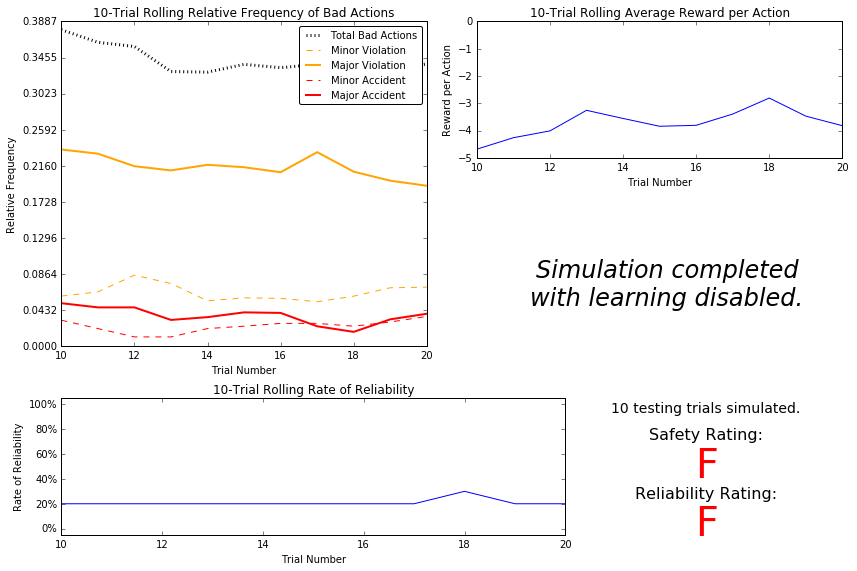

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** Analysis based on the visualisation are :

+ The agent was making bad decisions more than 38% of the time,out of which 6-7% of the time there were major accident,however this gradually decreased to 31% of bad decisions resulting in almost 4% accidents.

+ Since the agent is driving randomly and not learning we are late more than 80% of time and hence reliability doesnt matters in this case.

+ The agent is receiving negative rewards all the time while the penality initially high then gradually decreasing then again increasing decreasing continuum going on,but over the time in 20 trials it went from -4.5 to -4 i.e. there is an increase in rewards which is in conjunction with the performance of the agent.So as bad decisions decrease over time rewards increase.

+ As the number of trials increases the rolling rate of reliability does not change at all and reamins at 20%,but total bad decisions leading to minor and major accidents decreases over time.

+ This smartcab is taking random actions and not learning at all from its trials,also its reliability is very low i.e. 20% and also smartcab is taking bad decisions more than 40% of time which is really unsafe for passengers.Also note that due to all these results the safety and reliability rating is very low which is F for both,Hence this smartcab is not at all safe and reliable.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The features most relevant for both safety and efficiency are : 

+ waypoint : This feature is the driving force to the cab's decision making process and its a must feature that guides the cab which direction to proceedd and hence must be available to the agent.


+ light : This feature is important as it indicated the color of traffic light and the agent gets penalized on being idle at green light and moving at a red light,to make smartcab safe for its passengers and other vehicles in the world its necessary that agent receives rewards or penalties in correctly or incorrectly taking an action in a traffic signal and learn this behaviour in the long run.


+ left : This feature gives the ingformation if a car is present on the smartcab's left and its intended direction of travel.If the input light is red then smartcab will be in idle state,also vehicle on the left should also be in idle state.When the input light is green then this feature will be useful if vehicle to the left wants to take a right turn ans smart cab is moving in forward direction,in that case vehicle to the left's direction must be known to the agent.


+ oncoming : As the oncoming denotes the vehicle coming across the intersection from the smartcab and agent need to decide where to go when a vehicle is coming across intersection,hence this feature is also appropriate.


The feaatures least relevant for both safety and efficiency are:


+ deadline : for increasing efficiency and reliability deadline feature gives the number of actions remaining before running out of time but this feature isnt relevant as this can be learnt by the agent on the basis of rewards its receiving,also it can negatively affect safety of the smartcab and its passengers that it can break rules if deadline is close to zero.


+ right : This feature gives the information if a car is present on the smartcab's right and its intended direction of travel.When the input light is red this feature will not be useful as when input light is green and it wants to take a right turn then there is no harm to smartcab,also when it wants to take left turn then it should be on a separate lane where all the vehicles take left turn.so this feature is not appropriate.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Using the features discussed as appropriate for both safety and efficiency :

|  **Features** 	| **Possible States**  	|   **States**	|
|---	|---	|---	|
|  Waypoint 	|   3	|   Forward,Left,Right	|
|  Input:Light 	|   2	| Red,Green  	|
|  Input:Left 	|   4	| None,Forward,Left,Right  	|
|  Input:Oncoming	|   4	| None,Forward,Left,Right  	|
| Possible Outcomes | 4 | None,Forward,Left,Right |

Total number of states would be 3x2x4x4 i.e. 96 states and if we consider the possible outcomes also then number of states would be 3x2x4x4x4 i.e. 384 states.

This is not a long number so i think agent could learn these states in few trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

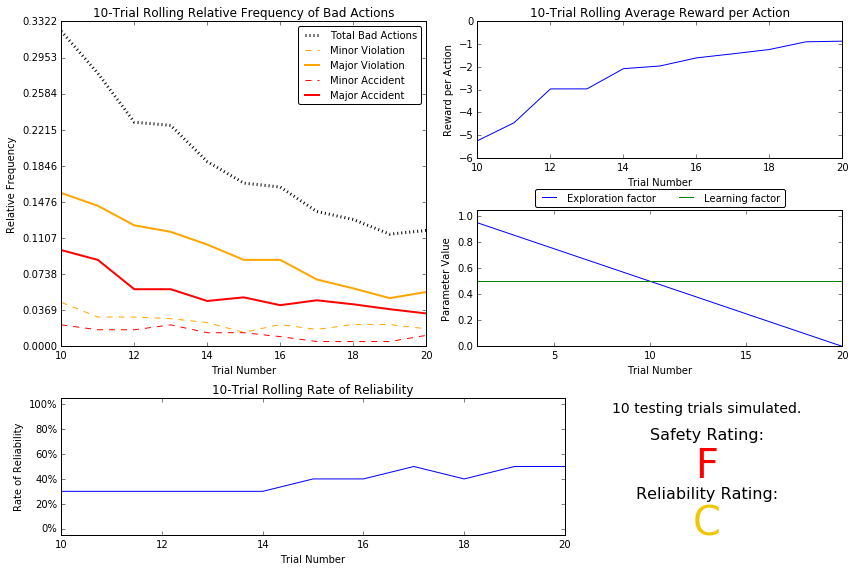

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** 


+ All results, bad actions, violations, accidents, rate of reliability, etc. do not behave the same between the basic driving agent and the default Q-Learning agent. Bad actions, violations, accidents all dramatically went down over time for the Q-Learning agent which was not the case for the basic driving agent. Also, the Q-Learning agent's rolling rate of reliability went from 20% to 50%, a vast improvement.
  
+ It took 20 training trials before the Q-Learning agent started testing. This number makes sense given that we decremented 0.05 at each training trial with an epsilon-tolerance of 0.05. So, 1.0 - (20 x 0.05) = 0.0 < 0.05.
  
+ Yes, the constant decaying function implemented for ϵ (the exploration factor) does seem to be accurately represented in the parameters panel.
 
+ As the number of training trails increase, the number of bad action decrease, and the average reward increased as well.
 
+  The safety and reliability rating are still low,its F for safety while for reliability it has improved to C. Even though the new Q-Learning agent performance has improved compare to the basic driving agent, it has not improved enough to earn a better rating for safety,however slight improvements in reliability rating we can see.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

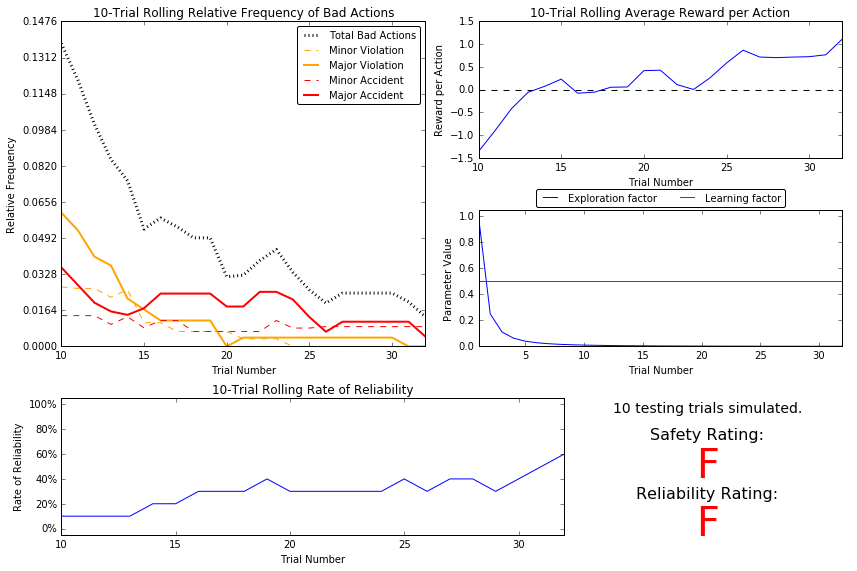

epsilon = 1.0/(t**2) alpha=0.5 tolerance=0.001


In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2) alpha=0.5 tolerance=0.001")

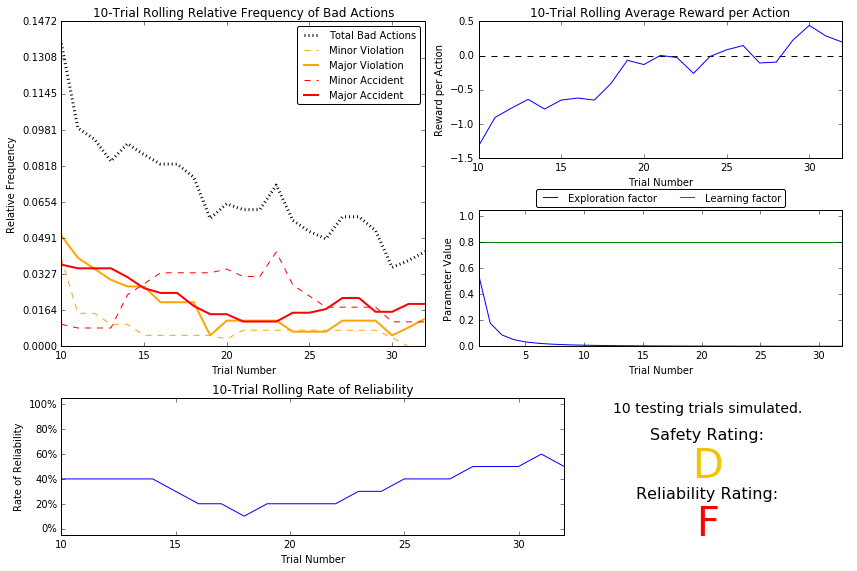

epsilon = 1.0/(t**2 + alpha*t) alpha=0.8 tolerance=0.001


In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2 + alpha*t) alpha=0.8 tolerance=0.001")

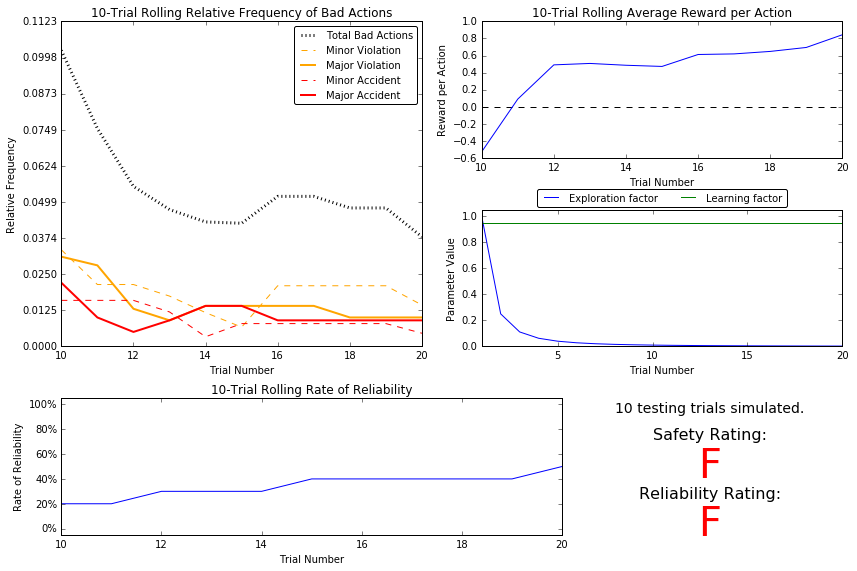

epsilon = 1.0/(t**2) alpha=0.95 tolerance=0.005


In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2) alpha=0.95 tolerance=0.005")

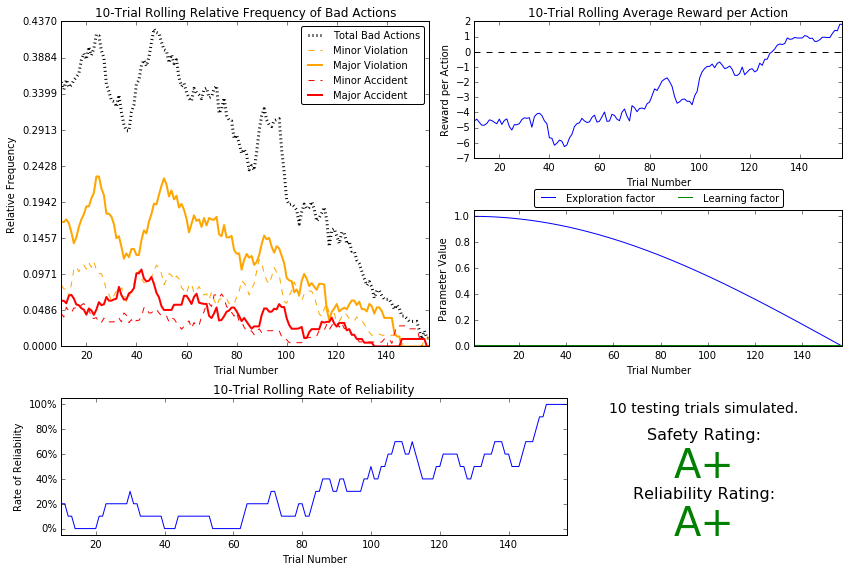

epsilon =abs(cos(alpha*t)) alpha=0.01 tolerance=0.001


In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)) alpha=0.01 tolerance=0.001")

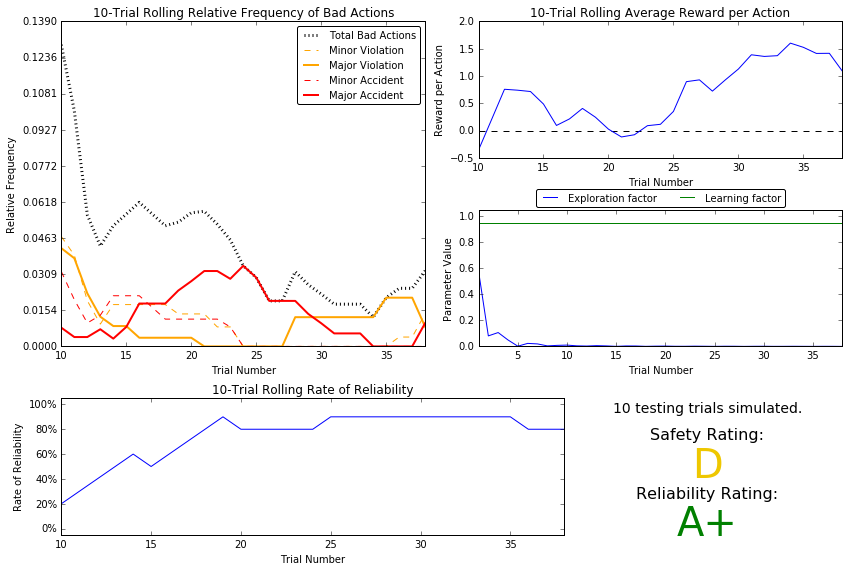

epsilon =abs(cos(alpha*t)/t**2) alpha=0.95 tolerance=0.0001


In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)/t**2) alpha=0.95 tolerance=0.0001")

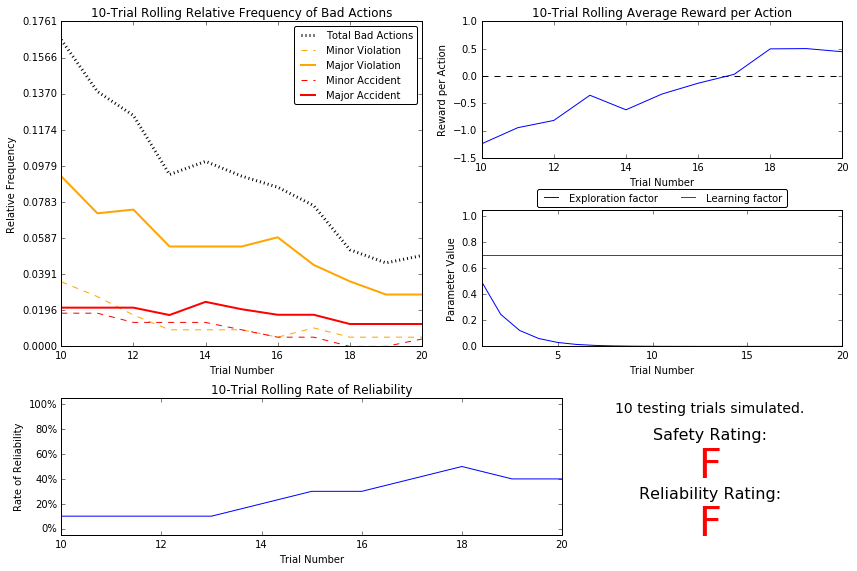

epsilon = exp(-alpha*t) alpha=0.7 tolerance=0.001


In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = exp(-alpha*t) alpha=0.7 tolerance=0.001")

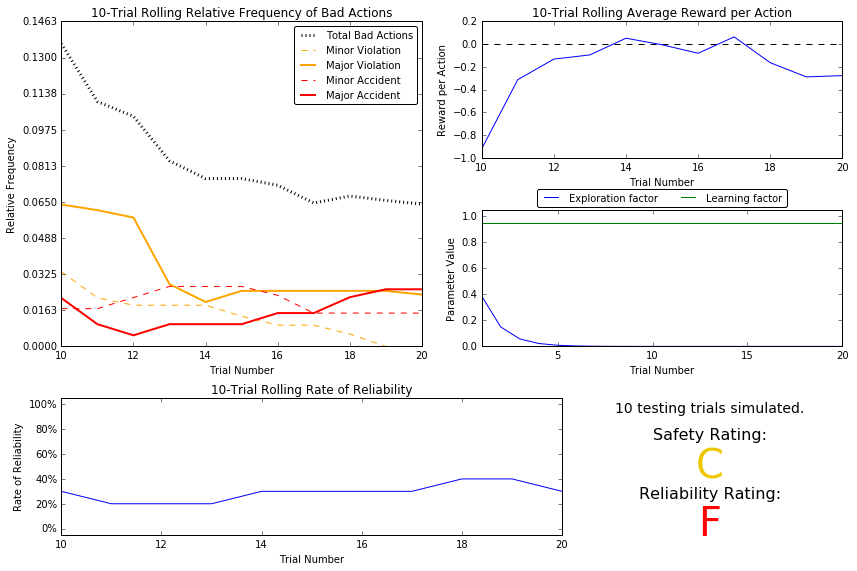

epsilon = exp(-alpha*t) alpha=0.95 tolerance=0.001


In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = exp(-alpha*t) alpha=0.95 tolerance=0.001")

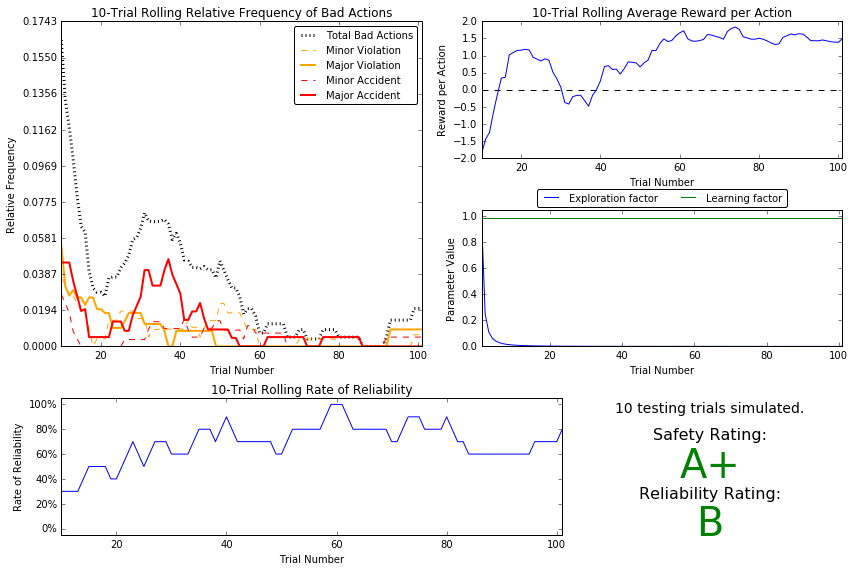

epsilon = 1.0/(t**2) alpha=0.99 tolerance=0.0001


In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2) alpha=0.99 tolerance=0.0001")

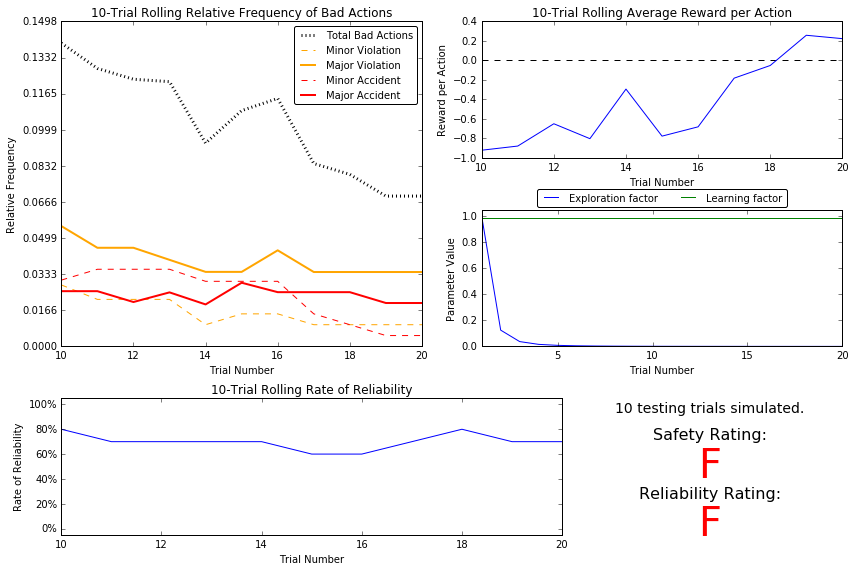

epsilon =1.0/(t**3) alpha=0.99 tolerance=0.001


In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =1.0/(t**3) alpha=0.99 tolerance=0.001")

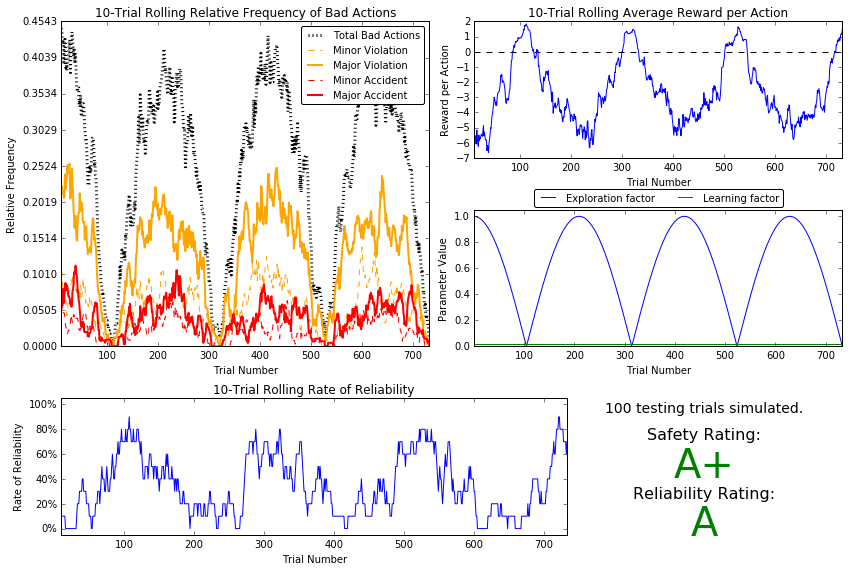

epsilon =abs(cos(alpha*t)) alpha=0.015 n_test=100 tolerance=0.001


In [15]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)) alpha=0.015 n_test=100 tolerance=0.001")

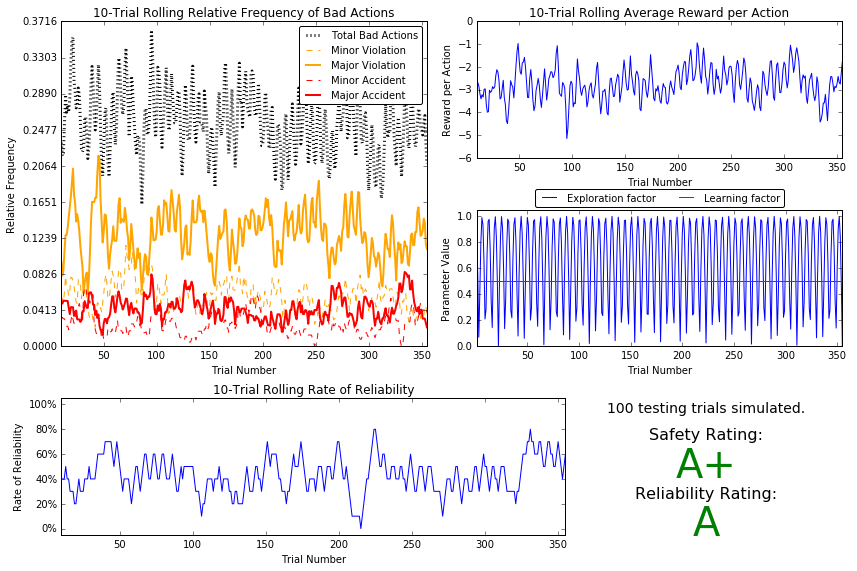

epsilon =abs(cos(alpha*t)) alpha=0.5 n_test=100 tolerance=0.001


In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)) alpha=0.5 n_test=100 tolerance=0.001")

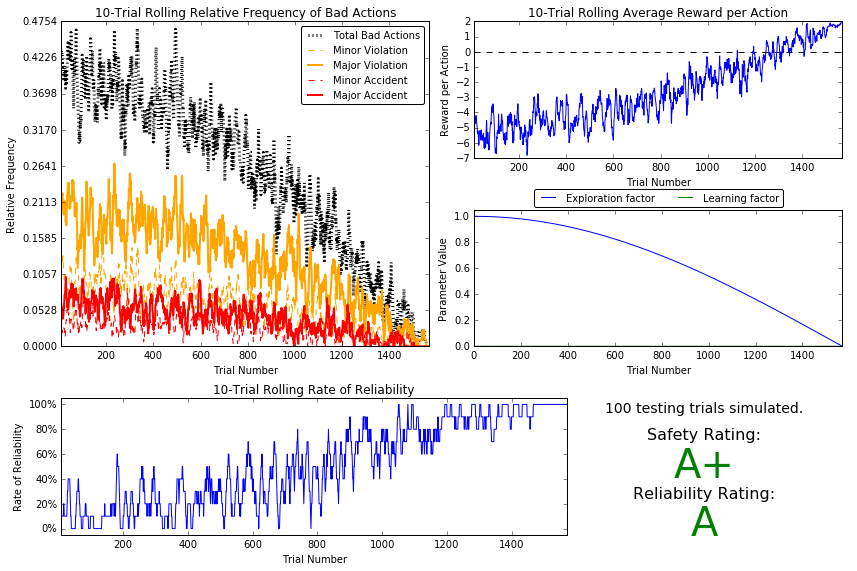

epsilon =abs(cos(alpha*t)) alpha=0.001 n_test=100 tolerance=0.001


In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)) alpha=0.001 n_test=100 tolerance=0.001")

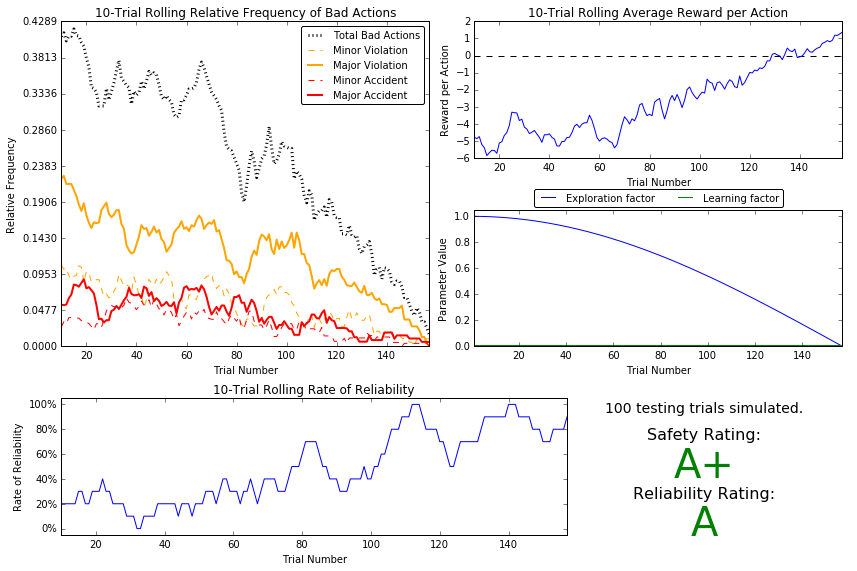

epsilon =abs(cos(alpha*t)) alpha=0.01 n_test=100 tolerance=0.001


In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon =abs(cos(alpha*t)) alpha=0.01 n_test=100 tolerance=0.001")

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

 | Attempt |  Epsilon - the exploration factor | Alpha | Tolerance | Safety | Reliability | n_test |
    | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
    | 1 | $$\epsilon=\frac{1}{t^2}$$ | 0.5 | 0.001 | F | F | 10 |
    | 2 | $$\epsilon=\frac{1}{t^2 + at}$$ | 0.8 | 0.001 | D | F | 10 |
    | 3 | $$\epsilon=\frac{1}{t^2 }$$ | 0.95 | 0.005 | F | F | 10 |
    | 4 | $$\epsilon=|\cos(at)|$$ | 0.01 | 0.001 | A+ | A+ | 10 |
    | 5 | $$\epsilon=\frac{|\cos(at)|}{t^2}$$ | 0.95 | 0.0001 | D | A+ | 10 |
    | 6 | $$\epsilon={e}^{-(at)}$$ | 0.70 | 0.001 | F | F | 10 |
    | 7 | $$\epsilon={e}^{-(at)}$$ | 0.95 | 0.001 | C | F | 10 |
    | 8 | $$\epsilon=\frac{1}{t^2}$$ | 0.95 | 0.0001 | A+ | B | 10 |
    | 9 | $$\epsilon=\frac{1}{t^3}$$ | 0.95 | 0.001 | F | F | 10 |
    | 10 | $$\epsilon=|\cos(at)|$$ | 0.015 | 0.001 | A+ | A | 100 |
    | 11 | $$\epsilon=|\cos(at)|$$ | 0.5 | 0.0001 | A+ | A | 100 |
    | 12 | $$\epsilon=|\cos(at)|$$ | 0.001 | 0.001 | A+ | A | 100 |
    | 13 | $$\epsilon=|\cos(at)|$$ | 0.01 | 0.0001 | A+ | A | 100 |
    | **Final** | **$$\epsilon=|\cos(at)|$$** | **0.01** | **0.001** | **A+** | **A** | **100** |
    
    
 + At least 13 attempts were made before deriving the final optimized Q-Learning agent with differnt epsilons, alpha and    tolerance values, including these combinations (all the  decaying functions,epsilon and alpha used with their repective ratings are displayed in above table). I settle on using the epsilon=|/cos(at)| as the final exploration factor. All results, bad actions, violations, accidents, rate of reliability, etc. do not behave the same between the basic driving agent, the default and the final optimized Q-Learning agents. Bad actions, violations, accidents all dramatically went down over time for the final optimized Q-Learning agent even when compared to the default Q-Learning agent which was clearly superior to the basic driving agent. Also, the final optimized Q-Learning agent's rolling rate of reliability went from around 40% dropped down to 0% while it was optimizing on reducing bad actions and then came back up to almost 100% at the end of around 160 trial training runs. When comparing this to the default Q-Learning agent's rolling rate of reliablity from 25% to a peak of 50% then down to 45% and the constent 20% from the basic driving agent, a vast improvement.
 
 
 
 + It took 157 training trials before the final optimized Q-Learning agent started testing. This number makes sense given that we epsilon=|/cos(at)| with a: alpha = 0.01 and t starting at 1 at each training trial with an epsilon-tolerance of 0.001. So, /cos(0.01x157) = COS(1.57) = 0.0 < 0.001.
 
 
 
 + In the last few tests for alpha and epsilon ,many different values of them are chosen all giving same A+ rating for safety and A rating for reliability but i have chosen the last one with the decaying function |/cos(at)| with alpha = 0.01 and tolerance = 0.001 because using these parameters with the above mentioned decay function produces a graph that tends to decrease the bad decisions,major-minor accidents in a decreasing fashion,like it was around 40% initilly then slight increase then slight decrease but as the agent learns the graph semms to be decreasing bad decisions and accidents as a whole.However if we see 10th,11th or 12th experiment the learning is happening but the graphis bit obfuscated and there is sudden huge decrease in bad decisions or sudden huge increase in bad decisions while obtaining the ratings as A+ and A for safety and reliability it would be preferred to use the decay function and parameter as in 14th experiment so as to give the learning a smooth touch and make the agent learn gradually rather than abruptly.The final decaying function implemented for ϵ (the exploration factor) does seem to be accurately represented in the parameters panel, which should be a stretched out quarter circle. As the table above reads, at attempt 14, the final solution was epsilon = |/cos(at)| with epsilon-tolerance of 0.001 and alpha of 0.01. The cosine curve seems to matter for the agent to learn the rules of the road for an A+ safety rating, and the long tail matters for the agent to eventually follow the waypoints, but this is still not completely set since the agent still only gets an A rating and not an A+ rating. The long tail to 'epsilon-tolerance' was so that it can learn all of the safety rules in the 96 possible state combinations that I outlined in answer to Question 5.
 
 
 
 + As the number of training trails increase, the number of bad action actually increased at the beginning and peaked at around 42% then when down sporadicaly to pratically zero bad actions at the end of 157 training trials, and the average reward at first decreased until after 20 training trials and then increased and decreased till 60 trials while as a whole increasing towards positive reward,then finally to a positive number at the end of the 157 training trials. This optimized Q-Learner's results is close to perfect. At the moment it has earned an A+ for Safety and an A for Reliability for 100 n_tests.
 
 
 
 + The safety and reliability rating are now A+ and A with the optimized Q-Learning agent. This again is superior to the default Q-Learning agent and the basic driving agents, since they both earned ratings of F for both safety and reliability. Since the Q-Learner's results are A+ for Safety and A for Reliability, There is no doubt that the agent has learnt the appropriate policy.
 
 
I am satisfied with the Smartcab agent's A+ ratings for safety and A rating for reliability after 100 tests trials.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

For me the optimal policy would be when there is a red light and the waypoint is lets say forward with no oncoming traffic and no cars on the left of smartcab and below is how the agent should react :

| N | State  | Actions  | Policy  |
|---|---|---|---|---|
| 1  |{Forward,Red,None,None}   | None  |  Optimal |
| 2  | {Forward,Red,None,None}  | Forward  | Incorrect  |
| 3  |{Forward,Red,None,None}   | Left  | Incorrect  |
| 4 | {Forward,Red,None,None}  | Right  | Suboptimal  |

Looking in the sim-improved-learning.txt the following is the optimal policy found :

forward_red_None_None

 -- forward : -3.67  
 -- None : 1.22  
 -- right : 0.16  
 -- left : -4.23
 
 In this the Q-value of "None" is more than any other possible action denoting that the agent should be idle when the signal is red.This is the result of reinforcement learning,apart from this is has also learnt the suboptimal policy "right" corresponding to a Q-value of 0.16 that is the second largest amongst all other possible actions.This makes sense as according to US traffic rules you are allowed to turn right when signal is red(many other countries has free left turn when signal is red).This behavior can be changed according to how data is provided to agent,initially i have chosen that giving information to the smartcab's left vehicle only makes sense and not right due to US traffic laws and separate lane system,so as far as i understand due to that agent has learnt a suboptimal policy to take right instead of left.
 
 
Policy which i found was suboptimal was:
   
 forward_red_right_None  
 
 -- forward : -1.04  
 -- None : 0.08  
 -- right : 0.13  
 -- left : -1.16  
 
Here the light is red and waypoint is forward and there is a vehicle in the left which wants to take right turn and there is no oncoming traffic,here suboptimal policy learned is the agent will take right as it has the highest Q value rahter than remaining idle or taking a left turn(which may cause a accident as vehicle to the left also wants to take right turn).
 
Another policy found in sim-improved-learning was found to be :

right_green_left_None  

 -- forward : 0.01  
 -- None : -0.23  
 -- right : 0.07  
 -- left : 0.12  
 
 This denotes that even if the age nt wants to go right in green signal it will end up going left as it has the highes q-value amongst all.This means that agent is not efficient and it may take wrong turns as it could be.I think thats the reason agent has received a rating A in reliability.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Possible explanations for not using discount factor 'gamma' here can be :

+ The agent knows very little about the grid world created.It just knows the oncoming traffic at intersection or only directions where to go.This project does not expose (x,y) cordinates of the world so that agent would be in a position to bias its decision if its actually going away/near the destination only ont he basis of rewards its concluding which direction to go so if we add discount factor that will change rewards and include future rewards it would instead of helping negatively affect the agent as it would always try to gain more and more long term future rewards.

+ The destination is changing randomly with every training-testing trial and no one fixed goal is asked by the agent to learn.As policies and future rewards will be location/goal based as decribed above suggests that there would be no long tern goal associated at any single point as goal is randomly changing. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.